<a href="https://colab.research.google.com/github/nakedsamurai/Khanaliev/blob/main/%D0%9A%D0%BE%D0%BD%D1%82%D0%B5%D1%81%D1%821_%D0%A2%D1%83%D0%B7%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Контест 1

Выполнила: Тузова Ксения

1) Подключим библиотеки и загрузим файлы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [ ]:
train_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


2) Обработаем данные. Проверим на пропуски, обработаем их, уберем дубликаты

In [ ]:
# Проверим количество пропусков в каждом признаке
print("Количество пропусков в каждом признаке:")
print(train_data.isnull().sum())

Количество пропусков в каждом признаке:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel 

Оставим только числовые сотлбцы

In [ ]:

new_train = train_data.dropna().drop_duplicates().select_dtypes(include=[np.number])
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9529 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         9529 non-null   float64
 1   AnnualIncome                9529 non-null   float64
 2   CreditScore                 9529 non-null   float64
 3   LoanAmount                  9529 non-null   float64
 4   LoanDuration                9529 non-null   float64
 5   NumberOfDependents          9529 non-null   float64
 6   MonthlyDebtPayments         9529 non-null   float64
 7   CreditCardUtilizationRate   9529 non-null   float64
 8   NumberOfOpenCreditLines     9529 non-null   float64
 9   NumberOfCreditInquiries     9529 non-null   float64
 10  DebtToIncomeRatio           9529 non-null   float64
 11  BankruptcyHistory           9529 non-null   float64
 12  PreviousLoanDefaults        9529 non-null   float64
 13  PaymentHistory              9529 non-n

3) Сотавим матрицу кореляции


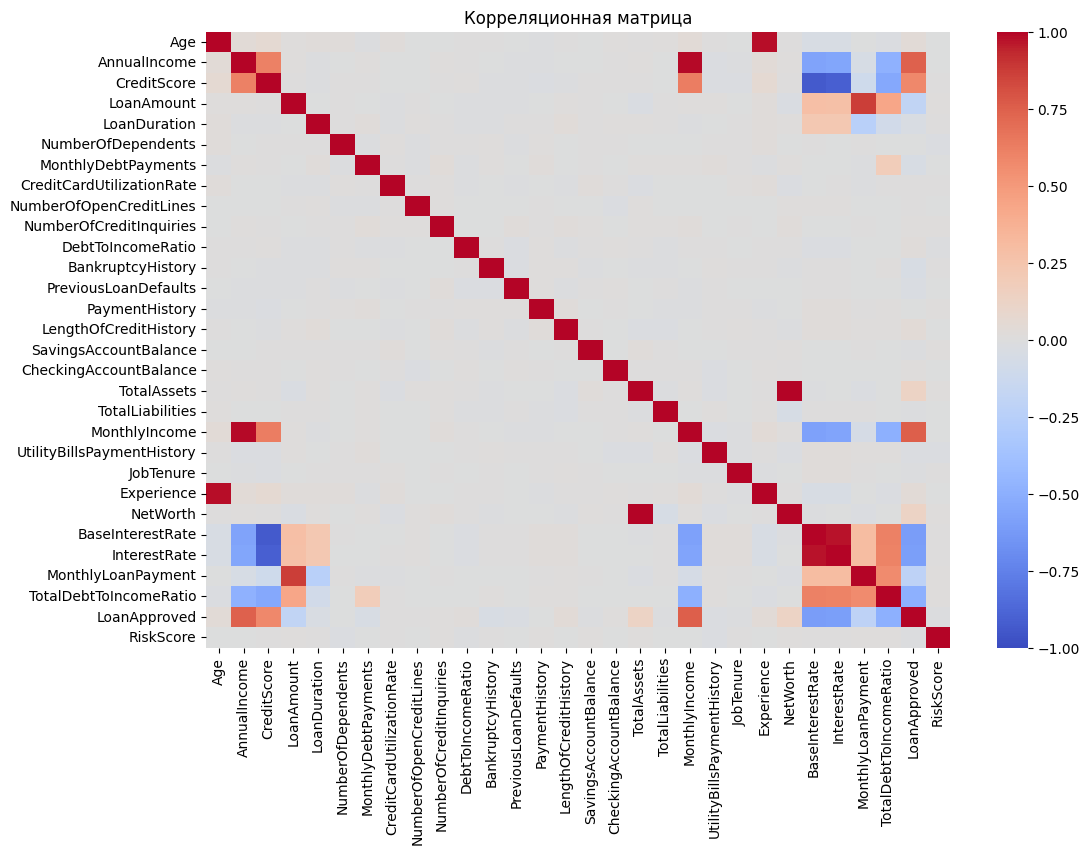

In [ ]:
corr_matrix = new_train.corr()

# Визуализация матрицы корреляций с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()


RiskScore не с чем явно не корелирует

4) Посмотрим на описание таргет значения

<Axes: ylabel='Frequency'>

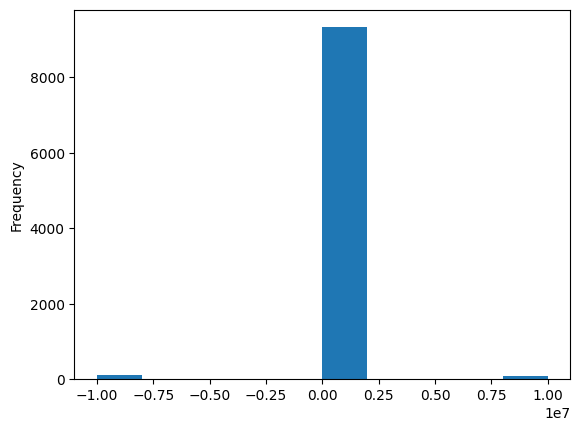

In [ ]:
new_train['RiskScore'].plot.hist()

Видим, что есть выбросы в краевых случаях (1% < и > 99%), уберем их

<Axes: ylabel='Frequency'>

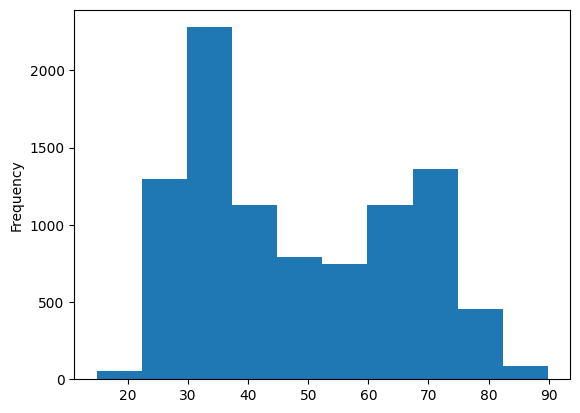

In [ ]:
new_train = new_train[
    (new_train['RiskScore'] > new_train['RiskScore'].quantile(0.01)) &
    (new_train['RiskScore'] < new_train['RiskScore'].quantile(0.99))]

new_train['RiskScore'].plot.hist()

6) Начнем обучение модели

In [ ]:
x = new_train.drop(['RiskScore'], axis=1)
y = new_train['RiskScore']

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y)
model = LinearRegression()
model.fit(x_trn, y_trn)

y_pr = model.predict(x_tst)
mse = mean_squared_error(y_tst, y_pr)

print(f"MSE на тестовых данных: {mse}")
# Кросс-валидация
mse_sc = make_scorer(mean_squared_error)
cv_sc = cross_val_score(model, x, y, cv=5, scoring=mse_sc)
print("MSE для каждого фолда: ", cv_sc)
print(f"Средний MSE: {cv_sc.mean()}")

MSE на тестовых данных: 19.425924413776098
MSE для каждого фолда:  [20.0365645  19.09552913 19.68515477 20.26160905 20.57413515]
Средний MSE: 19.93059851821398


7)Визуализация предсказанных значений

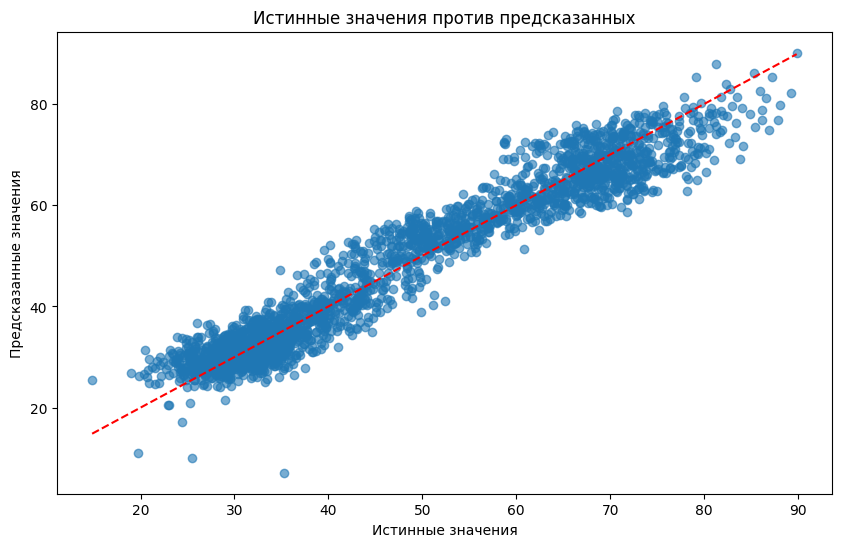

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_tst, y_pr, alpha=0.6)
plt.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()], 'r--')  # Линия y=x
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные значения против предсказанных')
plt.show()

8) Предсказание на тестовом наборе данных

In [ ]:

test_data_cleaned = test_data.select_dtypes(include=[np.number])
test_data_cleaned = test_data_cleaned.reindex(columns=x.columns, fill_value=0)

test_predictions = model.predict(test_data_cleaned)

# Подготовка файла для отправки
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'RiskScore': test_predictions
})

submission.to_csv('submission.csv', index=False)
print("Файл для отправки успешно сохранен как 'submission.csv' ")

Файл для отправки успешно сохранен как 'submission.csv' 


In [ ]:
t = pd.read_csv('submission.csv')
t.head()

,ID,RiskScore
0,0,32.960519
1,1,57.503058
2,2,30.784533
3,3,31.665624
4,4,35.514199
